# Lab 3.2: Discrete Probability Distributions

## Outline

* Simulate and plot discrete distributions
* Calculate probabilities of events based on PMF and CDF
* Model / describe data using discrete distributions

## Simulate and Plot

### Example

Tom takes bus to school 5 days a week. The bus is on time 60% of the time, and the number of days it is on time varies from week to week.  

Let $X$ be the number of days that the bus is on time in a given week, we have $X \sim Binomial(5, 0.6)$.

To get an idea of how the "on-time days" vary, we could simulate the distribution of $X$.

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
from scipy.stats import binom

n = 5
p = 0.6

# Simulate 1000 values of X
sim = binom.rvs(n, p, size = 1000)
sim[0:10]

array([4, 2, 5, 3, 4, 3, 2, 3, 3, 2])

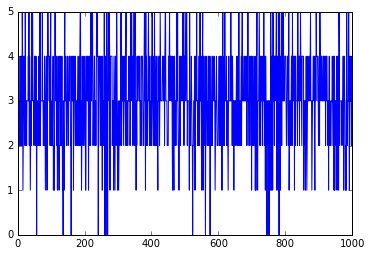

In [7]:
# Plot the simulations

plot(sim);

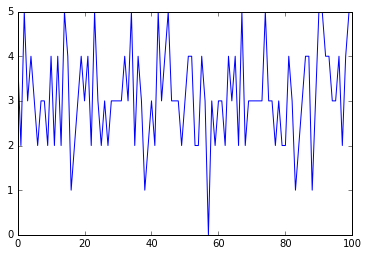

In [8]:
plot(sim[0:100]);

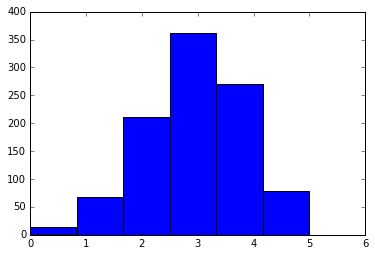

In [9]:
# Plot the distribution of the 1000 simulations of X

hist(sim, bins = 6);

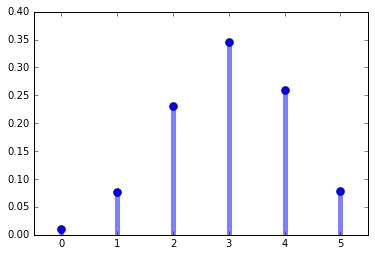

In [10]:
# Display the probability mass function of X

x = arange(0, 6)

plot(x, binom.pmf(x, n, p), 'bo', ms=8)
vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ylim(0, 0.4)
xlim(-0.5, 5.5);

## Calculate Probabilities of Events

In [11]:
# Calculate the probability that the bus is on time 5 days a week

p5 = binom.pmf(5, n, p)
p5

0.077759999999999996

In [12]:
# Calculate the probability that the bus is on time more than 3 days in a week
# Want P(X > 3), which is the same as (1 - P(X < or = 3))

1 - binom.cdf(3, n, p)

0.33695999999999993

## Data Modeling using Discrete Distributions

You are given a [CSV file](https://s3-us-west-2.amazonaws.com/dsci/6002/data/monthly_purchase_count.csv) containing the number of times 10,000 customers purchase from Company A in the span of a month. In order to understand the purchasing data better, you are asked to find a distribution that fits / describes the data.

- First import `numpy`, `scipy`, `pandas` and `matplotlib`

In [13]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [14]:
# %load fit.py
from scipy.optimize import minimize
from scipy.misc import factorial
from scipy.special import comb
import numpy as np

def fit_poisson(data):

    def poisson(k, lamb):
        """poisson pdf, parameter lamb is the fit parameter"""
        return (lamb**k/factorial(k)) * np.exp(-lamb)


    def negLogLikelihood(params, data):
        """ the negative log-Likelohood-Function"""
        lnl = - np.sum(np.log(poisson(data, params[0])))
        return lnl

    result = minimize(negLogLikelihood,  # function to minimize
                      x0=np.ones(1),     # start value
                      args=(data.values,),      # additional arguments for function
                      method='Powell',   # minimization method, see docs
                      )
    return result.x.flatten()[0]

def fit_negative_binomial(data):
    m = data.mean()[0] # pr / (1 - p)
    v = (np.sum((data - m)**2) / (len(data) - 1))[0] # m / (1 - p)
    p = 1 - m / v
    r = (m - m*p) / p
    return r, 1-p

In [15]:
# see fit.py for details

from fit import fit_poisson, fit_negative_binomial

- Read in the CSV file with `pandas` 

In [16]:
monthly_purchases = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/monthly_purchase_count.csv')

In [17]:
monthly_purchases.describe()

,0
count,10000.000000
mean,19.724500
std,7.773985
min,1.000000
25%,14.000000
50%,19.000000
75%,24.000000
max,58.000000


- The first step is always to plot the data to get a general sense of the distribution
- We will be using this plot later again, so I am going to define a function here
- The `normed` argument converts the frequency counts to probabilities on the `y` axis

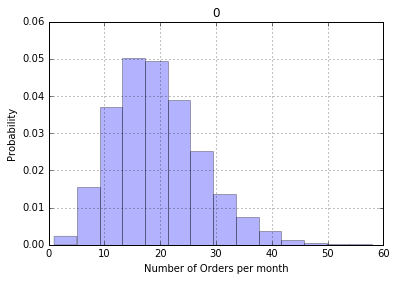

In [18]:
monthly_purchases.hist(bins=14, alpha=.3, normed=True)
ylabel('Probability');
xlabel('Number of Orders per month');

- With count data, we often consider fitting the data with the **Poisson** or **Negative Binomial** distribution
- Let's take a look at the **Poisson** and **Negative Binomial** distributions

<img align="left" width="400px" src="images/pois.png">
<img align="left" src="images/neg_binom.png">

- Let's start with the **Poisson** distribution
- Based on the **image of Poisson above**, a $\lambda$ of around 15 would seem to be a good starting point


In [19]:
from scipy import stats

# Define a Poisson distribution with lambda = 15
poisson15 = stats.poisson(15.0)

# Define the x range of the data (0-60)
x = arange(60)

# Compute the PMF based on poisson with lambda of 15
poisson_y = poisson15.pmf(x)

- Let's plot the fitted distribution on top of the data

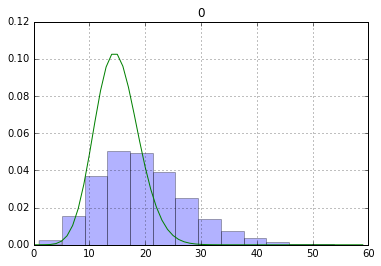

In [20]:
monthly_purchases.hist(bins=14, alpha=.3, normed=True)
plot(x, poisson_y);

- It seems like we are a bit off target in terms of fit
- There are better ways to find $\lambda$ with the best fit
- We will cover that later in the course
- For now, you are provided with a `fit_poisson()` function

In [21]:
optimal_lambda = fit_poisson(monthly_purchases)
optimal_poisson = stats.poisson(optimal_lambda)
optimal_poisson_y = optimal_poisson.pmf(x)
optimal_lambda

19.724500004818786

- So we were not that far off with our initial guess, let's plot again

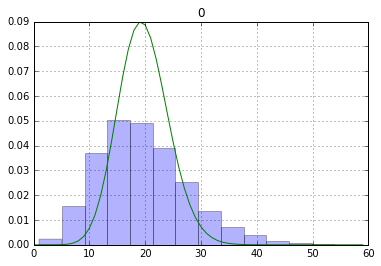

In [22]:
monthly_purchases.hist(bins=14, alpha=.3, normed=True)
plt.plot(x, optimal_poisson_y);

The fit has improved, but it is still not a great fit.

In today's lab exercise, you will try to fit a Negative Binomial distribution to the data.

## Lab Exercises

1) Identifying Distributions

Often we have to identify what distribution we should use to model a real-life
situation. This exercise is designed to equip you with the ability to do so.

For each question:

- Name the most appropriate distribution and the associated parameter(s)

- Set up equation for the distribution, e.g.

  ```
  Let X be the number of heads in 30 coin flips:
  X ~ Binomial(n=30, p=0.5)
  ```

- Calculate the answer, e.g. ```P(X = 15) = 0.144``` or ```E(X) = 15```
  depending what the question is asking.

- Do it by hand first, then check your answers in Python.


1. A typist makes on average 2 mistakes per page.  
What is the probability of a particular page having no errors on it?

In [118]:
# Let X be the number of mistakes on a page.
# X~Poisson(2)

# Define a Poisson distribution with lambda = 2
poisson2 = stats.poisson(2)

# Compute the PMF based on poisson with lambda of 2
p = poisson2.pmf(0)
p

0.1353352832366127

$2.$ Components are packed in boxes of 20. The probability of a component being
   defective is 0.1.  
   What is the probability of a box containing 2 defective components?

In [119]:
# Let X = # of defective components
# X~binomial(20, .1)

p = stats.binom.pmf(2,20,.1)
p

0.28517980706429813

$3.$ You need to find a tall person, at least 6 feet tall, to help you reach a cookie jar. 8% of the population is 6 feet or taller.  
If you wait on the sidewalk, how many people would you expect to have passed you by before you'd have a candidate to reach the jar?




$Let X be the numer of people expected to have passed
X~Geometric(.08)
p is the probability of success, which is .08

E[X] = 1/p = 1/.08 = 12.5

$

$2)$ Consider a loaded die for which it is twice as likely to roll a '1' as the other numbers.  
1. If we roll the die 6 times, what is the probability that each number shows up exactly once (i.e. $P(X_1 = 1, X_2 = 1, \dots, X_6 = 1)$)?
2. Simulate the above experiments 100 times. (You might find the function [`numpy.random.multinomial`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.multinomial.html) handy.)
3. Let $X_i$ be the number of times number $i$ shows up in the 6 rolls, plot the histograms of the values for $X_1$ and $X_2$ from the simulation results. (You should have 100 values for $X_1$ and 100 values for $X_2$ from the simulation.)
4. Estimate the mean and variance for $X_1$ and $X_2$ from the simulation results.
5. Calculate the theoretical mean and variance for $X_1$ and $X_2$. Compare them to your estimates above.


$
$1.$ The loaded die is a 7 sided die with 2 ones.

Then P(X=1) = 2/7, P(X=n) = 1/7, for n in [2,6]

Let X be the number rolled.  Then X~multinomial(one=1, two=1, three=1, four=1, five=1, six=1)

$1.$  P(each number shows up exactly once) = fact(6) * (2/7) * (1/7)^5 = .012



In [82]:
## $2.$  Simulate 100 times.

v = [2/7]
for i in range(5):
    v.append(1/7)

# 100 simulations
# sims_100 = []
# for i in range(100):
    sim = numpy.random.multinomial(6, v, 100)
#     sims_100.append(sim)
    
import pprint
# pprint.pprint(sim)

# for each simulation the nth element represents the number of times we roll a value of n+1

In [83]:
# multinomial?

In [84]:
factorial(6) * (2/7) * (1/7)**5

0.01223979804333228

100 [2, 2, 3, 3, 2, 2, 3, 2, 2, 4, 2, 3, 1, 2, 2, 4, 1, 2, 2, 0, 4, 1, 3, 3, 1, 1, 2, 1, 1, 3, 3, 1, 3, 2, 2, 2, 2, 0, 3, 1, 2, 1, 0, 0, 0, 3, 0, 1, 1, 0, 2, 4, 1, 2, 0, 0, 0, 0, 0, 1, 1, 3, 4, 3, 4, 3, 2, 2, 1, 1, 1, 2, 2, 4, 1, 1, 4, 1, 2, 0, 1, 3, 1, 1, 3, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 1, 2, 2, 4]
100 [1, 0, 1, 2, 4, 2, 0, 1, 0, 1, 0, 2, 3, 0, 1, 2, 0, 3, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 3, 1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 2, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0]


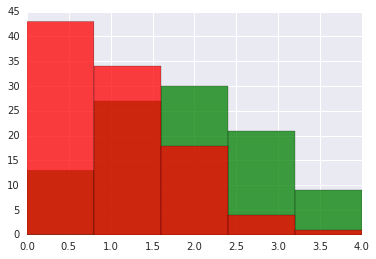

In [104]:
# sim = numpy.random.multinomial(6, [2/7, 1/7, 1/7, 1/7, 1/7, 1/7], 100)
# pprint.pprint(sim)

X1 =[]
X2 =[]

# Let $X_i$ be the number of times number $i$ shows up in the 6 rolls
n = 0
while n < len(sim):
    X1.append(sim[n][0])
#     n+=1
    X2.append(sim[n][1])
    n+=1

# You should have 100 values for $X_1$ and 100 values for $X_2$ from the simulation.
print(len(X1), X1)
print(len(X2), X2)


# plot the histograms of the values for $X_1$ and $X_2$ from the simulation results
from collections import Counter
Counter(X1)
Counter(X2)

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Counter1 = plt.hist(X1, 5,facecolor='green', alpha=0.75)
Counter2 = plt.hist(X2, 5, facecolor='red', alpha=0.75)


Estimate the mean and variance for $X_1$ and $X_2$ from the simulation results.

q.2 part 4 Based on the histograms of X_1(green) and X_2(red), we estimate visually a mean of 2 and 1, 
for each histogram, respectively.  We calculate the sample mean and variance below:

In [117]:
#estimate of mean and variance of Xi and Xii from sample above.
import numpy as np
#x = np.asarray([1,2,3,4,5,6])
X1_array = np.asarray(X1)
X2_array = np.asarray(X2)

X1_m = X1_array.mean()
X1_v = X1_array.var()

X2_m = X2_array.mean()
X2_v = X2_array.var()

print ("X1 mean and variance:")
print(X1_m, X1_v)

print("X2 mean and variance:")
print(X2_m, X2_v)

#Calculated theoretical mean and variance of X1 and X2.
E_X1 = 6 * (2/7)
print("Theoretical mean of X1:", E_X1)
E_X2 = 6 * (1/7)
print("Theoretical mean of X2:", E_X2)

# \textstyle{\mathrm{Var}}(X_i) = n p_i (1-p_i)
Var_X1 = 6 * (2/7) * (5/7)
print("Theoretical variance of X1:", Var_X1)
Var_X2 = 6 * (1/7) * (6/7)
print("Theoretical variance of X2:", Var_X2)

#  /**"""  the following lines are incorrect:
#x = np.asarray([1,2,3,4,5,6])
# m_roll = (((2/7)*1) + (1/7)*(2 + 3 + 4 + 5 + 6))
# print("Theoretical mean:")
# print(m_roll)
# v = ((2/7)+(1/6*(2**2+3**2+4**2+5**2+6**2)))
# t_var = v - m_roll**2
# print("Theoretical variance:")
# print(t_var)
# """ */

X1 mean and variance:
1.86 1.3404
X2 mean and variance:
0.86 0.8404
Theoretical mean of X1: 1.7142857142857142
Theoretical mean of X2: 0.8571428571428571
Theoretical variance of X1: 1.2244897959183674
Theoretical variance of X2: 0.7346938775510203


3) We saw in the **Data Modeling using Discrete Distributions** section of the lab that the Poisson distribution did not fit the data very well. In this part of the lab exercise, we will try to fit a Negative Binomial model instead. In general, Negative Binomial has more flexiblility in terms of fitting data since it takes 2 parameters. You can use the `fit_negative_binomial` function in the `fit.py` module to estimate the parameters of the Negative Binomial distribution based on the data. (You might want to read through the code for the function to understand how to use it. You do not need to completely understand the estimation method used by the function yet - it uses the Method of Moments (MOM) which we will cover later in the course.)

**Note**: [`SciPy`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nbinom.html) defines the Negative Binomial distribution slightly differently - instead of the total number of trials, $X$ is defined as the number of failures before the nth success.
Fit a Negative Binomial distribution to the data.
Plot the distribution fitted on top of the histogram of the data.
Comment on the model fit.

In [66]:
monthly_purchases.describe()

,0
count,10000.000000
mean,19.724500
std,7.773985
min,1.000000
25%,14.000000
50%,19.000000
75%,24.000000
max,58.000000


In [77]:
# imports, definitions, and data loading included above

# X is the # if failures before the nth success
optimal_np = fit_negative_binomial(monthly_purchases)
print(optimal_np)

(9.5566843544072668, 0.32637629129809564)


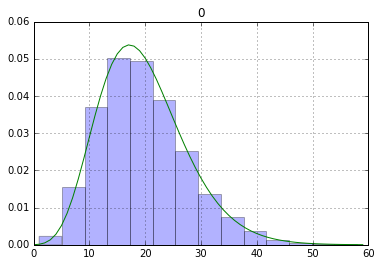

In [81]:
# imports, definitions, and data loading included above

# Define a negative binomial distribution with the optimal params
optimal_nbinom = stats.nbinom(optimal_np[0], optimal_np[1])

# # Define the x range of the data (0-60)
x = arange(60)

# Compute the PMF based on nbinom with optimal n and p
optimal_nbinom_y = optimal_nbinom.pmf(x)

# plot the fitted distribution on top of the data
monthly_purchases.hist(bins=14, alpha=.3, normed=True)
plot(x, optimal_nbinom_y);

The fit is very good because we used the method of moments to approximate the optimal parameters for n and p.